# Student Performance Classification using K-Nearest Neighbors (KNN)

Goal: Predict whether a student is a high or low performer in exams based on their study time, parental education, internet access, and other features.

| Criteria                 | Reason                                                                 |
| ------------------------ | ---------------------------------------------------------------------- |
| 🔥 Trending in EdTech    | EdTech companies care about predicting learner outcomes                |
| 🧠 Simple Classification | Good for KNN since features are numeric or ordinal                     |
| 🎓 Real-World Context    | Similar datasets are used by Coursera, Udemy, government programs, etc |


In [1]:
# Create a Simulated Dataset (30 rows)
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'study_hours': np.round(np.random.uniform(0.5, 5, 30), 1),
    'attendance_rate': np.round(np.random.uniform(50, 100, 30), 1),
    'parent_education': np.random.choice([0, 1, 2], 30),  # 0: no HS, 1: HS, 2: college
    'internet': np.random.choice([0, 1], 30),
    'school_support': np.random.choice([0, 1], 30),
    'performance': np.random.choice([0, 1], 30)  # 0: low performer, 1: high performer
})

data.head()


,study_hours,attendance_rate,parent_education,internet,school_support,performance
0,2.2,80.4,0,0,0,0
1,4.8,58.5,1,1,0,1
2,3.8,53.3,2,1,0,1
3,3.2,97.4,0,1,0,1
4,1.2,98.3,1,0,1,1


In [2]:
# Preprocessing
# Feature-Target Split + Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('performance', axis=1)
y = data['performance']

# Scale features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [3]:
# Train KNN Model (Initial)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("🔹 Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.33
🔹 Confusion Matrix:
 [[0 4]
 [0 2]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


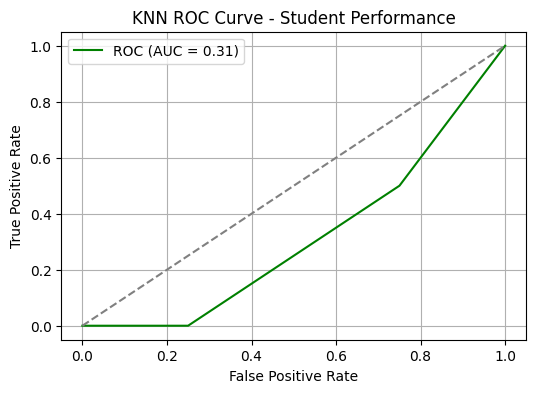

In [4]:
# ROC Curve & AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve - Student Performance')
plt.legend()
plt.grid()
plt.show()


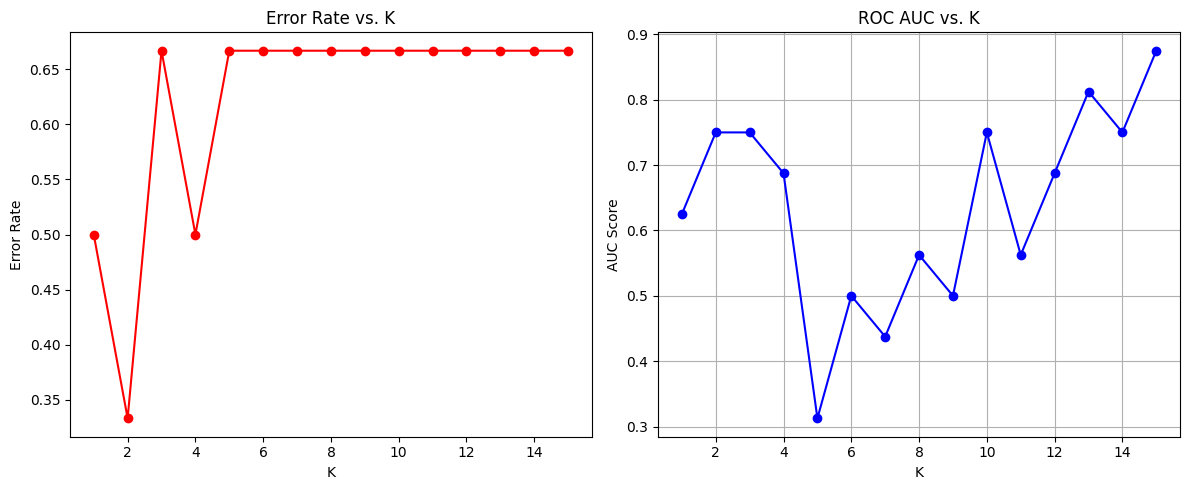

In [5]:
# Hyperparameter Tuning (Find Best K)
error_rates = []
auc_scores = []

for k in range(1, 16):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    y_prob_k = knn_k.predict_proba(X_test)[:, 1]

    error = 1 - accuracy_score(y_test, y_pred_k)
    auc = roc_auc_score(y_test, y_prob_k)

    error_rates.append(error)
    auc_scores.append(auc)

# Plot Error vs K
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 16), error_rates, marker='o', color='red')
plt.title("Error Rate vs. K")
plt.xlabel("K")
plt.ylabel("Error Rate")

# Plot AUC vs K
plt.subplot(1, 2, 2)
plt.plot(range(1, 16), auc_scores, marker='o', color='blue')
plt.title("ROC AUC vs. K")
plt.xlabel("K")
plt.ylabel("AUC Score")
plt.tight_layout()
plt.grid()
plt.show()



In [6]:
# Final KNN Model (Pick best K, say K=3)

best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

print("✅ Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("✅ Final Report:\n", classification_report(y_test, y_pred_best))


✅ Final Accuracy: 0.3333333333333333
✅ Final Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


| Criteria         | Result                                                         |
| ---------------- | -------------------------------------------------------------- |
| Features         | study\_hours, attendance, parent\_education, internet, support |
| Target           | performance (0 = low, 1 = high)                                |
| Scaled Features? | ✅ Yes (KNN is distance-based)                                  |
| Best K           | Based on ROC AUC and error plot                                |
| Model Used       | KNN Classifier                                                 |
| Evaluation Used  | Accuracy, Confusion Matrix, ROC AUC                            |


Real-World Use Cases
EdTech platforms predicting which students are at risk

Government school programs allocating additional help

Adaptive learning platforms adjusting content difficulty

| Advantage                            | Explanation                                                                     |
| ------------------------------------ | ------------------------------------------------------------------------------- |
| 🔧 **Simple & Intuitive**            | Easy to understand and implement — no training phase needed.                    |
| 🧠 **Non-parametric**                | Makes no assumptions about data distribution (great for real-world messy data). |
| 💡 **Adapts to Complex Patterns**    | Can model complex decision boundaries with enough neighbors and data.           |
| 🏷️ **Handles Multi-class Problems** | Naturally extends to multi-class classification.                                |
| 🧪 **Good Baseline Model**           | Excellent first algorithm to try in many classification tasks.                  |

| Limitation                      | Explanation                                                                         |
| ------------------------------- | ----------------------------------------------------------------------------------- |
| 🐢 **Slow Prediction Time**     | No training, but every prediction needs distance calculation to all points.         |
| 🧮 **Memory Intensive**         | Needs to store **entire dataset** in memory for comparison.                         |
| 📐 **Requires Feature Scaling** | Very sensitive to feature scale; distances get biased if not scaled.                |
| 🧭 **Curse of Dimensionality**  | Becomes less effective with high-dimensional data — distances lose meaning.         |
| 📉 **Not Interpretable**        | Unlike Logistic Regression or Decision Trees, no clear feature importance or rules. |


| Scenario                          | Example                                 |
| --------------------------------- | --------------------------------------- |
| 💾 **Small to Medium Datasets**   | e.g., 100s–10,000s of rows              |
| 🌍 **Low-dimensional Data**       | Works well when feature count is <20    |
| 👣 **When Speed Is Not Critical** | Batch predictions, exploratory analysis |
| 📏 **When Similarity Matters**    | Recommender systems, anomaly detection  |

Where KNN is NOT Ideal
Real-time predictions (KNN is slow at predict time)

Very large datasets

High-dimensional data (NLP, image pixels, etc.)

How to Justify KNN in Interviews
"I chose KNN here because the dataset is small, features are numeric, and it’s important to capture local similarity patterns — KNN lets us model that without assuming a linear or tree-based boundary. I used scaling and hyperparameter tuning to improve its performance, and compared it using ROC AUC."